In [10]:
import pandas as pd
import matplotlib.pyplot as plt
df_temp =  pd.read_csv("zsf_fq_4_10.txt",sep=' ',names=['X_a','Y_a','Z_a','X_ω','Y_ω','Z_ω'])
a1 = df_temp[df_temp['Z_ω']== 1000].index.tolist() #判断Z_ω=1000的次数，a1/2为动作次数
print('zsf_fq_4_10文件 动作次数是：',len(a1)/2) 

zsf_fq_4_10文件 动作次数是： 122.0


In [11]:
a1

[0,
 126,
 127,
 237,
 238,
 313,
 314,
 437,
 438,
 572,
 573,
 700,
 701,
 819,
 820,
 953,
 954,
 1074,
 1075,
 1209,
 1210,
 1343,
 1344,
 1462,
 1463,
 1600,
 1601,
 1735,
 1736,
 1851,
 1852,
 1972,
 1973,
 2111,
 2112,
 2248,
 2249,
 2383,
 2384,
 2550,
 2551,
 2693,
 2694,
 2831,
 2832,
 2961,
 2962,
 3096,
 3097,
 3212,
 3213,
 3340,
 3341,
 3468,
 3469,
 3610,
 3611,
 3747,
 3748,
 3883,
 3884,
 4015,
 4016,
 4147,
 4148,
 4293,
 4294,
 4410,
 4411,
 4535,
 4536,
 4654,
 4655,
 4786,
 4787,
 4909,
 4910,
 5048,
 5049,
 5180,
 5181,
 5310,
 5311,
 5431,
 5432,
 5579,
 5580,
 5705,
 5706,
 5828,
 5829,
 5954,
 5955,
 6081,
 6082,
 6215,
 6216,
 6345,
 6346,
 6458,
 6459,
 6584,
 6585,
 6700,
 6701,
 6822,
 6823,
 6948,
 6949,
 7063,
 7064,
 7183,
 7184,
 7295,
 7296,
 7417,
 7418,
 7534,
 7535,
 7649,
 7650,
 7779,
 7780,
 7935,
 7936,
 8080,
 8081,
 8214,
 8215,
 8359,
 8360,
 8487,
 8488,
 8619,
 8620,
 8769,
 8770,
 8917,
 8918,
 9047,
 9048,
 9172,
 9173,
 9301,
 9302,
 943

In [12]:
sub_df = {}
df = {}
for i in range(0,int(len(a1)/2)):
    sub_df[i] = df_temp.iloc[a1[i*2]+1:a1[(i*2)+1]] #切割：将每次动作切割出来
    print(i,sub_df[i])
    sub_df[i] = sub_df[i].rolling(window = 5).mean()
    sub_df[i] = sub_df[i].reset_index(drop=True) #重新定义行索引从0开始
    df_max = sub_df[i]['Z_ω'].idxmax() #找到Z_ω最大值点对应的行索引
    df[i] = sub_df[i].loc[df_max-24:df_max+25].reset_index(drop=True).fillna(0)
    #根据Z_ω行索引 提取动作段，前25个数据，后25个数据

0           X_a       Y_a       Z_a        X_ω        Y_ω        Z_ω
1    1.020996 -0.541016 -0.025879   1.036585   0.304878  -1.219512
2    1.049805 -0.567383 -0.031250   1.036585   0.304878  -1.219512
3    1.022949 -0.616699 -0.000977   1.036585   0.304878  -1.219512
4    0.983398 -0.402344  0.030273   1.036585   0.304878  -1.219512
5    0.947754 -0.330078  0.089844   1.036585   0.304878  -1.219512
..        ...       ...       ...        ...        ...        ...
121  1.096191 -0.131836  0.103516  11.219512 -30.914635  63.963417
122  1.021973 -0.050293 -0.287109  13.536586 -42.560978  53.109756
123  1.094238  0.048340 -0.167480  33.109756 -38.109756  42.804880
124  1.049316  0.124023  0.031738  15.304878 -23.109756  44.573174
125  1.061035  0.060547 -0.009766   6.707317 -18.475610  58.231710

[125 rows x 6 columns]
1           X_a       Y_a       Z_a        X_ω        Y_ω        Z_ω
128  1.029297 -0.153809 -0.085449  -0.609756  -1.463415   1.585366
129  1.034668 -0.152832 -0.086426 

20            X_a       Y_a       Z_a       X_ω       Y_ω       Z_ω
2552  1.031250 -0.078125  0.054199  1.524390 -0.670732 -2.682927
2553  1.037109 -0.081543  0.059082  1.524390 -0.670732 -2.682927
2554  1.039551 -0.072266  0.063965  1.524390 -0.670732 -2.682927
2555  1.034668 -0.063965  0.051758  1.524390 -0.670732 -2.682927
2556  1.021973 -0.062500  0.051758  1.524390 -0.670732 -2.682927
...        ...       ...       ...       ...       ...       ...
2688  1.025879 -0.012695  0.076660  2.926829 -0.243902 -0.426829
2689  1.026367 -0.017090  0.069824  3.841464 -0.975610 -0.975610
2690  1.029785 -0.020996  0.061523  3.475610 -1.524390 -0.792683
2691  1.028809 -0.015625  0.064453  2.804878 -1.951220 -0.060976
2692  1.022461 -0.035645  0.066406  1.402439 -2.073171  0.792683

[141 rows x 6 columns]
21            X_a       Y_a       Z_a       X_ω       Y_ω       Z_ω
2695  1.029297 -0.020996  0.067871 -0.426829  0.304878 -0.121951
2696  1.026367 -0.018555  0.065918  0.426829  0.060976 -0.12

47            X_a       Y_a       Z_a        X_ω        Y_ω       Z_ω
6083  1.019531 -0.085449 -0.081055  -1.036585   5.548780 -2.500000
6084  1.018555 -0.093750 -0.070312  -1.402439   5.914634 -2.195122
6085  1.027344 -0.078613 -0.069824   1.158537   5.609756 -3.231707
6086  1.018066 -0.067383 -0.072754   2.439024   5.243903 -3.780488
6087  1.013672 -0.064941 -0.061035   1.829268   5.365854 -3.048780
...        ...       ...       ...        ...        ...       ...
6210  1.063965 -0.018066  0.062012   8.963415 -20.000000  5.243903
6211  1.049805  0.008789  0.115723  10.487805 -17.682928  3.353659
6212  1.042480 -0.000488  0.050293  12.743903 -16.036585  2.500000
6213  1.037109  0.028320  0.019531  13.841464 -13.719513  2.195122
6214  1.020508  0.000000 -0.033203  10.121951 -11.097561  2.378049

[132 rows x 6 columns]
48            X_a       Y_a       Z_a       X_ω       Y_ω        Z_ω
6217  1.031250 -0.017090 -0.015137  0.304878 -3.353659   0.304878
6218  1.024902 -0.020996 -0.004883

77             X_a       Y_a       Z_a        X_ω        Y_ω        Z_ω
9952   1.020020 -0.022461 -0.030762   1.280488   0.243902   1.524390
9953   1.024902 -0.025391 -0.034668   1.463415   0.487805   1.036585
9954   1.022461 -0.022949 -0.039062   1.402439   0.792683   0.487805
9955   1.017578 -0.015625 -0.024902   0.792683   1.524390  -0.060976
9956   1.019043 -0.017090 -0.019531  -0.426829   2.256098  -0.182927
...         ...       ...       ...        ...        ...        ...
10064  1.033691 -0.056152 -0.013184 -15.731708  33.170730 -12.317074
10065  1.020020 -0.031738 -0.010254 -12.256098  35.426830 -10.121951
10066  0.985840 -0.020508 -0.022461 -12.073171  37.865856  -6.768293
10067  0.991211 -0.065430 -0.052734 -15.243903  40.182926  -2.987805
10068  0.983887 -0.012207  0.004395 -16.341463  42.195120  -0.487805

[117 rows x 6 columns]
78             X_a       Y_a       Z_a        X_ω       Y_ω       Z_ω
10071  1.008789 -0.058105 -0.080078   7.743903 -2.500000 -3.109756
10072  1

102             X_a       Y_a       Z_a        X_ω        Y_ω        Z_ω
13387  0.952148  0.042480 -0.012207 -18.536585  13.780488 -14.329268
13388  0.988281  0.025391 -0.066406 -11.097561  11.829268  -8.475610
13389  1.038574 -0.009277 -0.002930 -10.060976  11.341464  -2.195122
13390  1.070801 -0.033203  0.050781 -11.463415  10.548780   1.768293
13391  1.058105 -0.056152  0.022461  -7.621952   7.743903   2.987805
...         ...       ...       ...        ...        ...        ...
13501  1.067871 -0.118164  0.005859  -2.621951  -4.573171  -0.853659
13502  1.073242 -0.112305  0.031250  -0.121951  -4.390244  -1.463415
13503  1.072754 -0.095703  0.017578   1.036585  -4.695122  -0.731707
13504  1.063965 -0.102539 -0.006348   1.768293  -5.121951   0.243902
13505  1.055176 -0.119629 -0.006836   2.134146  -4.939024   0.914634

[119 rows x 6 columns]
103             X_a       Y_a       Z_a       X_ω       Y_ω        Z_ω
13508  1.039551 -0.097656 -0.062012  1.341463 -1.890244  -2.195122
13509 

In [13]:
for i in df:
    print(i,len(df[i]))

0 50
1 50
2 47
3 50
4 50
5 50
6 50
7 50
8 50
9 50
10 50
11 50
12 50
13 50
14 50
15 50
16 50
17 50
18 50
19 50
20 50
21 50
22 50
23 50
24 50
25 50
26 50
27 50
28 50
29 50
30 50
31 50
32 50
33 50
34 50
35 50
36 50
37 50
38 50
39 50
40 50
41 50
42 50
43 50
44 50
45 50
46 50
47 50
48 50
49 50
50 50
51 50
52 50
53 50
54 50
55 50
56 50
57 50
58 50
59 50
60 50
61 50
62 50
63 50
64 50
65 50
66 50
67 50
68 50
69 50
70 50
71 50
72 50
73 50
74 50
75 50
76 50
77 50
78 50
79 50
80 50
81 50
82 50
83 50
84 50
85 50
86 50
87 50
88 50
89 50
90 50
91 50
92 50
93 50
94 50
95 50
96 50
97 50
98 50
99 50
100 50
101 50
102 50
103 50
104 50
105 50
106 50
107 50
108 50
109 50
110 50
111 50
112 50
113 50
114 50
115 50
116 50
117 50
118 50
119 50
120 50
121 50


In [14]:
df[68]

X_a       Y_a       Z_a         X_ω         Y_ω         Z_ω
0   1.414844 -0.308984  0.479004   -2.256098    6.402439   -6.524390
1   1.444434 -0.332520  0.776660   -2.256098    6.402439   -6.524390
2   1.542578 -0.024414  0.936035   -2.256098    6.402439   -6.524390
3   1.689648  0.471387  0.948047   63.317076   16.731708  -61.548784
4   1.875488  0.885156  0.891504  125.426835   27.487806 -119.121958
5   1.988477  1.215234  0.666699  167.963421   39.109758 -187.036592
6   2.171582  1.353125  0.324609  184.585372   52.829270 -261.170740
7   2.269434  1.050293  0.091602  184.036592   68.853660 -335.378056
8   2.235937  0.475781 -0.055957  104.097565   78.426831 -350.304884
9   2.147852 -0.071191 -0.221387   18.573171   94.621953 -354.463416
10  2.086719 -0.488379 -0.415332  -49.463415  119.134149 -340.036584
11  2.052246 -0.960937 -0.541895  -82.987806  143.768295 -312.451218
12  2.054199 -1.397461 -0.666406  -90.963416  165.817077 -274.475612
13  2.130176 -1.795410 -0.810645  -68.987806  179.073176 -228.048782
14  2.168555 -2.052832 -0.974805  -15.914634  173.987810 -175.195125
15  2.220996 -2.198340 -1.107422   49.707320  149.743906 -109.158542
16  2.345996 -2.202637 -1.232422   95.670735  118.402443  -18.170736
17  2.654199 -2.127539 -1.221777  112.914638   87.060979  100.048780
18  3.185840 -1.927051 -1.132129  100.658540   58.439026  241.158544
19  4.060059 -1.718750 -1.138965   68.207319   31.926830  401.487821
20  5.282715 -1.115918 -1.204785   29.865854   11.414635  556.670750
21  6.517969 -0.544434 -1.266602   44.939026  -13.597561  685.170764
22  7.772266 -0.034863 -1.371680   87.682927  -34.914635  803.658576
23  8.853516  0.854199 -1.852539  147.048780  -38.329269  891.829302
24  8.836816  2.204199 -2.081348  209.500002  -19.036585  924.353692
25  7.696484  2.994336 -1.866309  216.000003   -7.670731  904.878080
26  6.242383  3.322754 -1.732715  109.707315  -12.499999  825.829290
27  4.599609  3.629199 -1.348633   25.682927  -24.182926  655.304890
28  2.743652  3.422070 -0.705957  -16.268291  -55.012198  442.060987
29  1.625781  2.714941 -0.185059  -53.134147 -101.646346  245.914637
30  1.186328  1.901953  0.082324  -50.597562 -134.719518   85.841465
31  0.955957  1.531250  0.360645    3.207320 -137.487810  -15.304881
32  0.735840  1.291406  0.306641   18.536587 -133.195127  -45.109758
33  0.689941  1.125391  0.345020   -3.414634 -124.792686  -36.731709
34  0.697656  0.843750  0.432324  -29.695122 -112.085368  -30.792684
35  0.821191  0.648242  0.436426  -42.914635  -98.182928  -33.219513
36  0.957813  0.400977  0.470605  -34.158537  -87.426831  -44.670733
37  1.072168  0.126953  0.493652  -20.207318  -77.292685  -65.256098
38  1.154688 -0.147461  0.468359  -18.829268  -63.390245  -89.000002
39  1.232715 -0.318945  0.428320  -21.719512  -48.719513 -109.426833
40  1.304102 -0.398340  0.408008  -22.841464  -36.036586 -124.963418
41  1.383398 -0.443945  0.383398  -25.585366  -24.060976 -137.548784
42  1.442969 -0.510156  0.347363  -22.548781  -13.707317 -150.195126
43  1.504004 -0.561426  0.329980  -11.963415   -6.768293 -162.756100
44  1.606348 -0.598926  0.319824   -1.073171   -1.878049 -173.451224
45  1.697949 -0.602832  0.266211    6.695122    3.402439 -182.621956
46  1.789063 -0.559961  0.185059   13.219512    8.463415 -192.719518
47  1.871094 -0.492285  0.105762   18.231708   11.768293 -204.317080
48  1.946973 -0.412793  0.015039   17.646342   13.170732 -216.365864
49  1.980762 -0.306641 -0.105859    9.207317   13.280488 -227.329276

In [15]:
#自动补全 只能在第一块不缺失的情况下使用

for i in df:
    if(len(df[i]) < 50):
        for j in range(df[i].index.size,50):
            df[i].loc[j] = df[i-1].loc[j]

In [16]:
#自动补全检测
for i in df:
    print(i,len(df[i]))

0 50
1 50
2 50
3 50
4 50
5 50
6 50
7 50
8 50
9 50
10 50
11 50
12 50
13 50
14 50
15 50
16 50
17 50
18 50
19 50
20 50
21 50
22 50
23 50
24 50
25 50
26 50
27 50
28 50
29 50
30 50
31 50
32 50
33 50
34 50
35 50
36 50
37 50
38 50
39 50
40 50
41 50
42 50
43 50
44 50
45 50
46 50
47 50
48 50
49 50
50 50
51 50
52 50
53 50
54 50
55 50
56 50
57 50
58 50
59 50
60 50
61 50
62 50
63 50
64 50
65 50
66 50
67 50
68 50
69 50
70 50
71 50
72 50
73 50
74 50
75 50
76 50
77 50
78 50
79 50
80 50
81 50
82 50
83 50
84 50
85 50
86 50
87 50
88 50
89 50
90 50
91 50
92 50
93 50
94 50
95 50
96 50
97 50
98 50
99 50
100 50
101 50
102 50
103 50
104 50
105 50
106 50
107 50
108 50
109 50
110 50
111 50
112 50
113 50
114 50
115 50
116 50
117 50
118 50
119 50
120 50
121 50


In [17]:
for i in df:
    for j in range(len(df[i])):
        if df[i].loc[j,'X_a'] == 0 and df[i].loc[j,'Y_a'] == 0 and df[i].loc[j,'Z_a'] == 0 and df[i].loc[j,'X_ω'] == 0 and df[i].loc[j,'Y_ω'] == 0 and df[i].loc[j,'Z_ω'] == 0:
            df[i].loc[j] = df[i-1].loc[j]

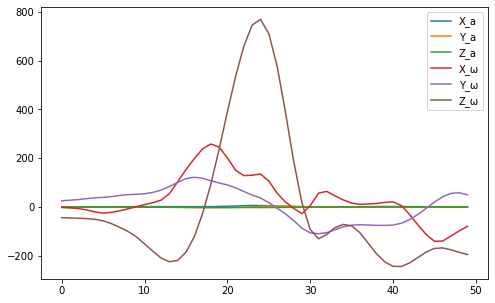

<Figure size 432x288 with 0 Axes>

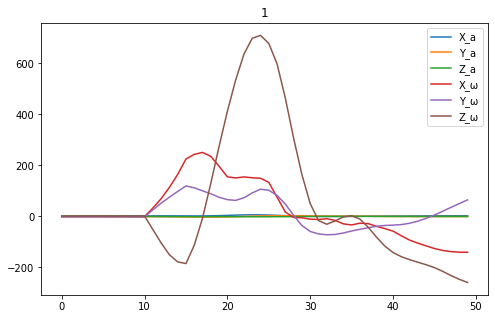

<Figure size 432x288 with 0 Axes>

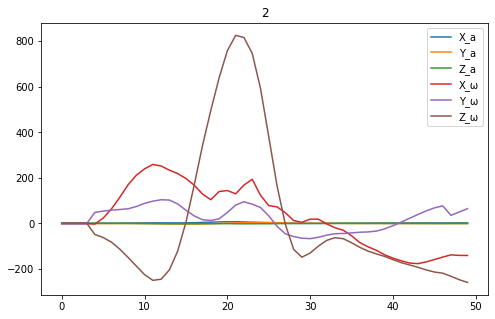

<Figure size 432x288 with 0 Axes>

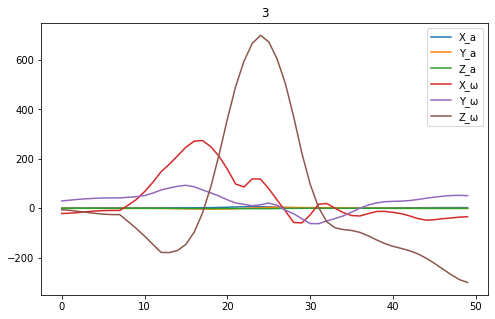

<Figure size 432x288 with 0 Axes>

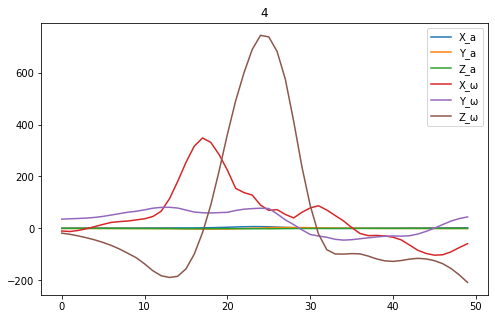

<Figure size 432x288 with 0 Axes>

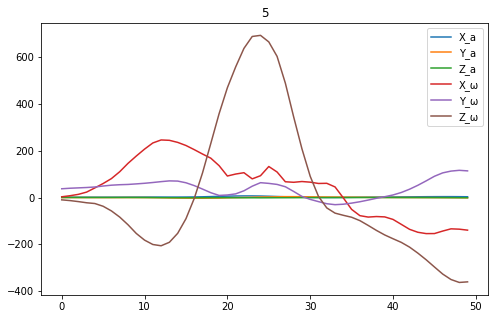

<Figure size 432x288 with 0 Axes>

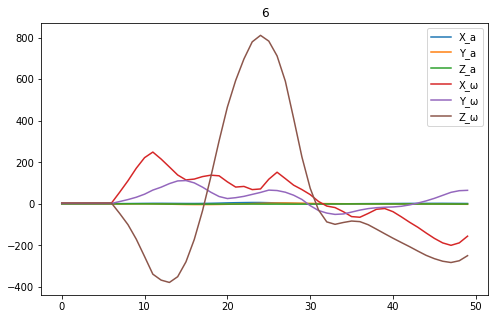

<Figure size 432x288 with 0 Axes>

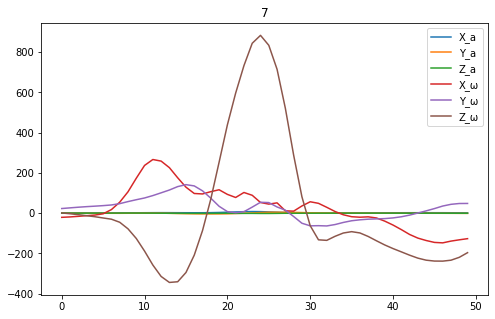

<Figure size 432x288 with 0 Axes>

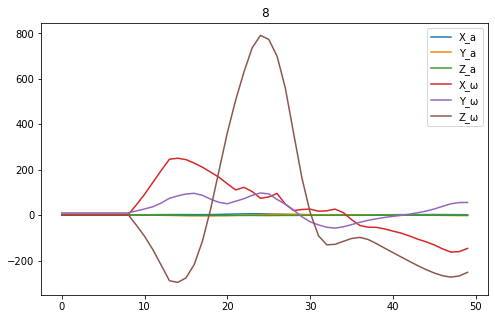

<Figure size 432x288 with 0 Axes>

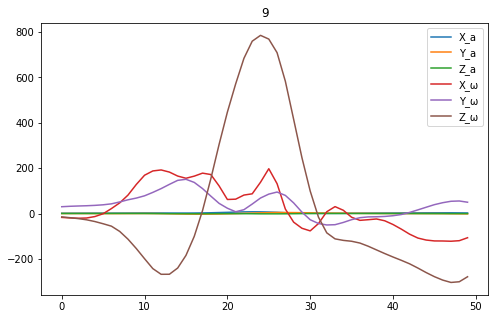

<Figure size 432x288 with 0 Axes>

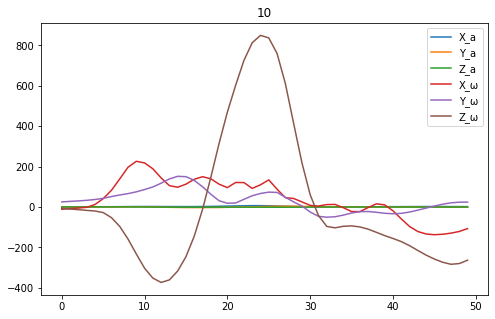

<Figure size 432x288 with 0 Axes>

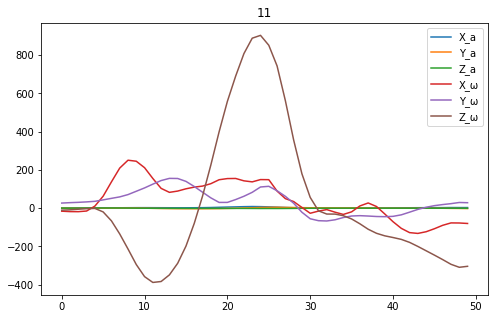

<Figure size 432x288 with 0 Axes>

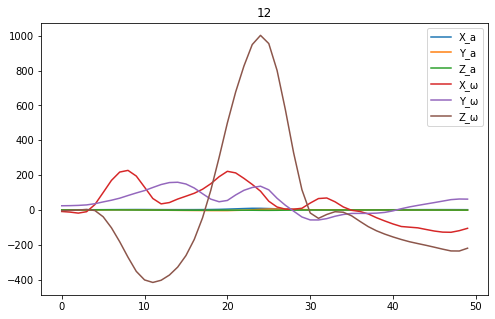

<Figure size 432x288 with 0 Axes>

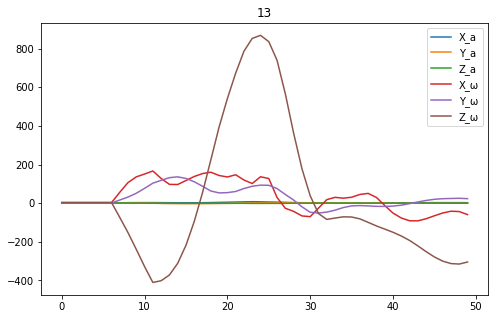

<Figure size 432x288 with 0 Axes>

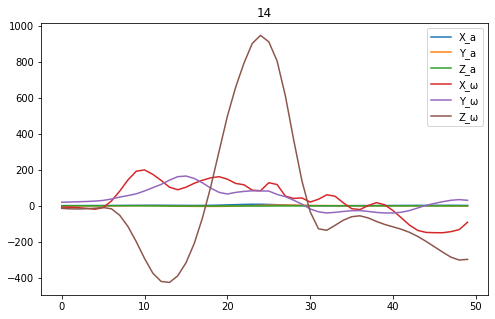

<Figure size 432x288 with 0 Axes>

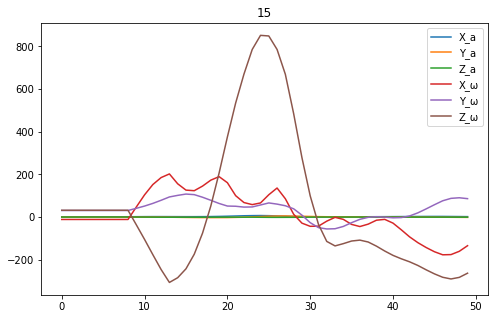

<Figure size 432x288 with 0 Axes>

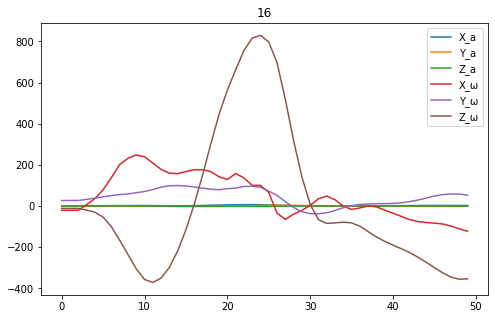

<Figure size 432x288 with 0 Axes>

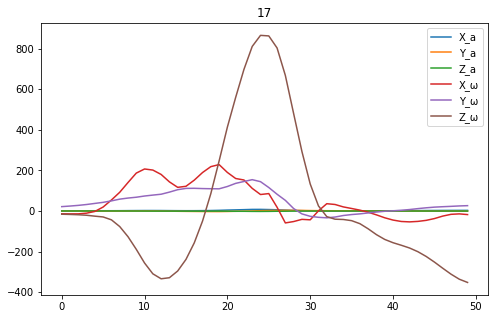

<Figure size 432x288 with 0 Axes>

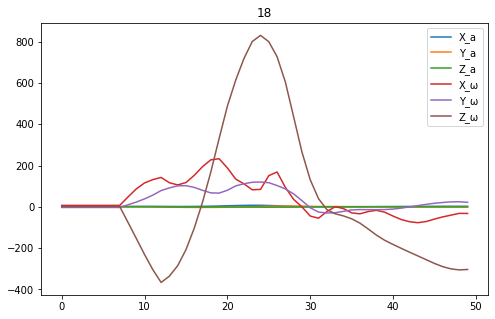

<Figure size 432x288 with 0 Axes>

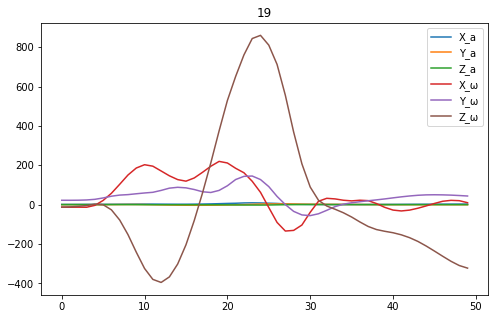

<Figure size 432x288 with 0 Axes>

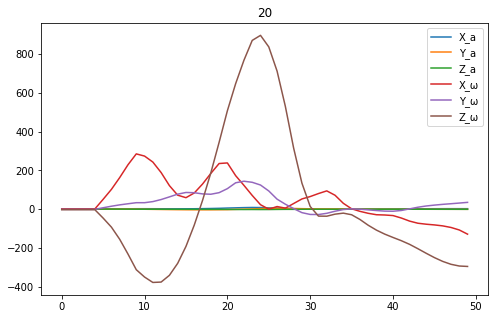

<Figure size 432x288 with 0 Axes>

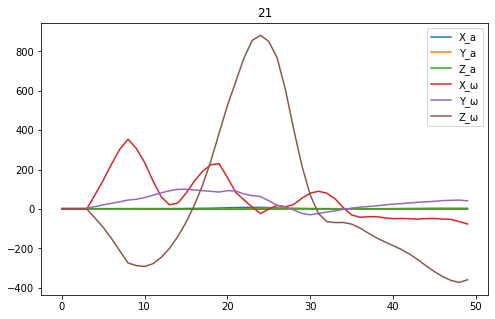

<Figure size 432x288 with 0 Axes>

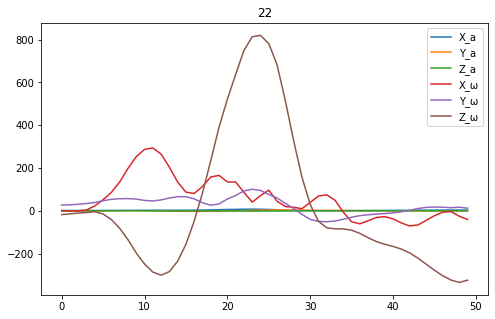

<Figure size 432x288 with 0 Axes>

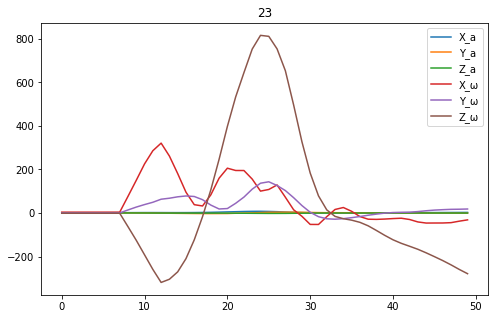

<Figure size 432x288 with 0 Axes>

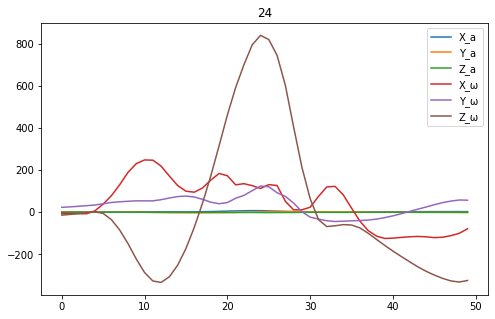

<Figure size 432x288 with 0 Axes>

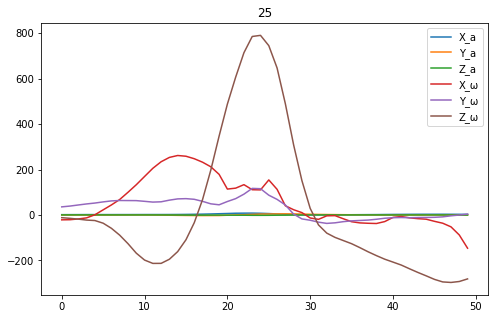

<Figure size 432x288 with 0 Axes>

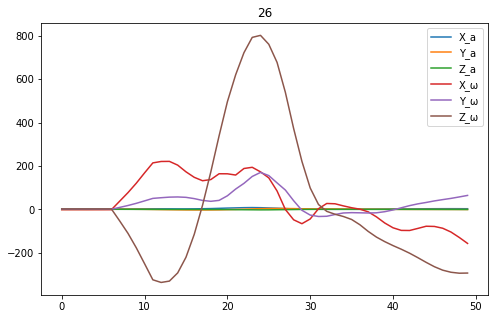

<Figure size 432x288 with 0 Axes>

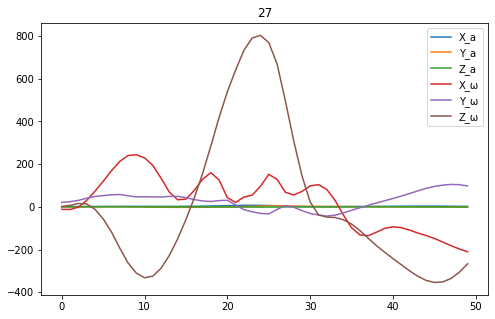

<Figure size 432x288 with 0 Axes>

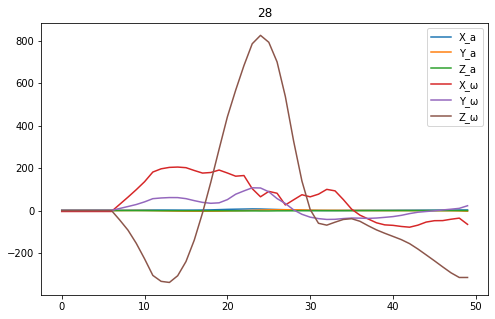

<Figure size 432x288 with 0 Axes>

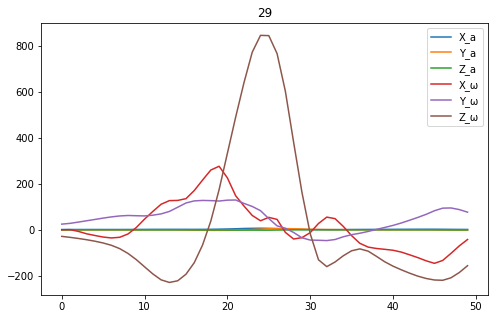

<Figure size 432x288 with 0 Axes>

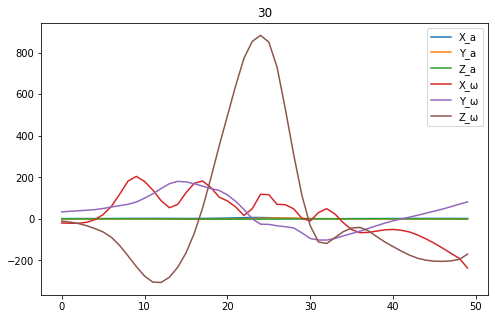

<Figure size 432x288 with 0 Axes>

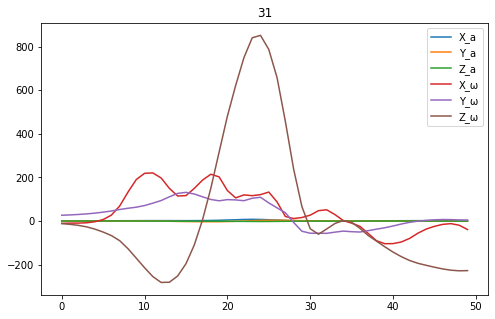

<Figure size 432x288 with 0 Axes>

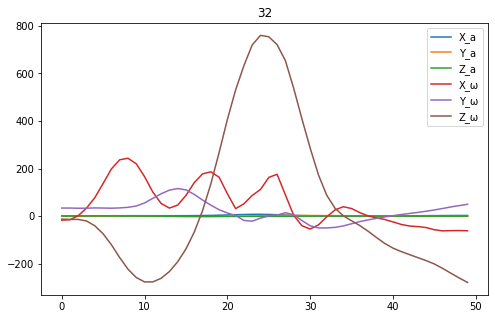

<Figure size 432x288 with 0 Axes>

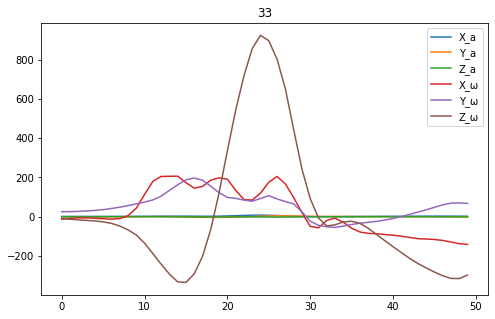

<Figure size 432x288 with 0 Axes>

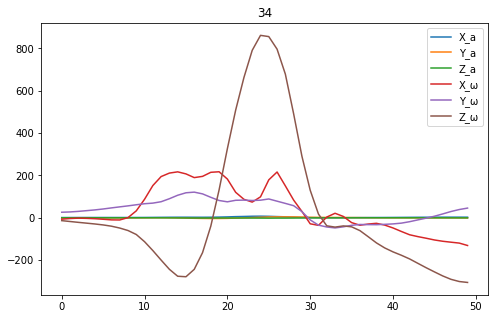

<Figure size 432x288 with 0 Axes>

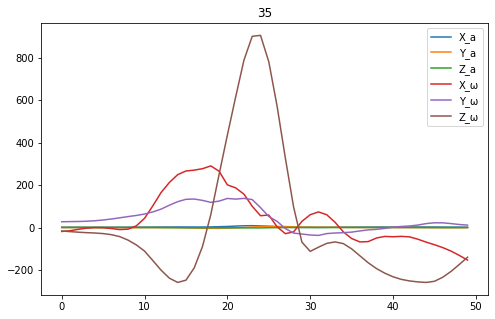

<Figure size 432x288 with 0 Axes>

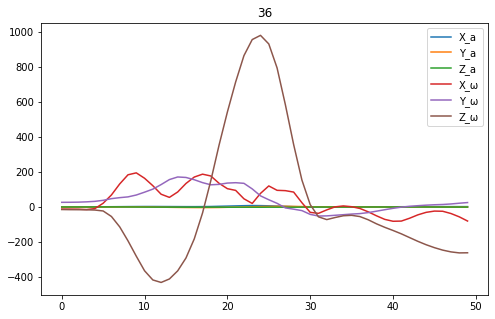

<Figure size 432x288 with 0 Axes>

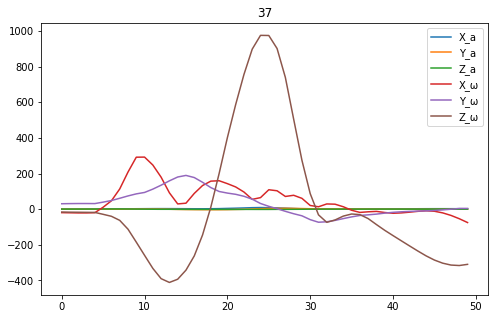

<Figure size 432x288 with 0 Axes>

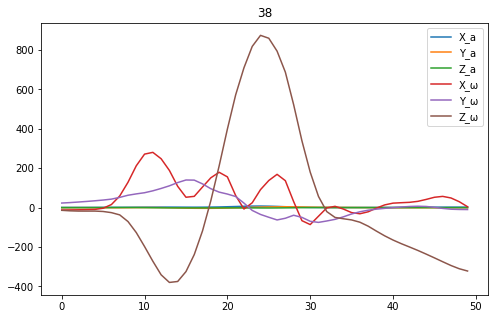

<Figure size 432x288 with 0 Axes>

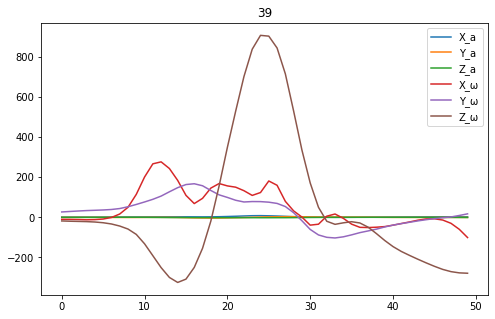

<Figure size 432x288 with 0 Axes>

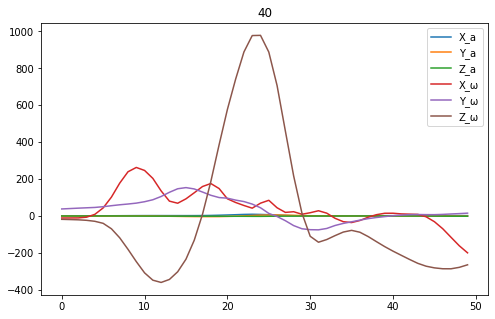

<Figure size 432x288 with 0 Axes>

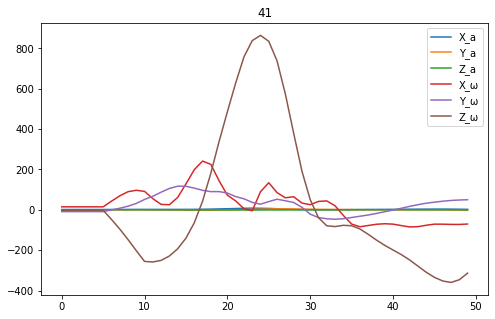

<Figure size 432x288 with 0 Axes>

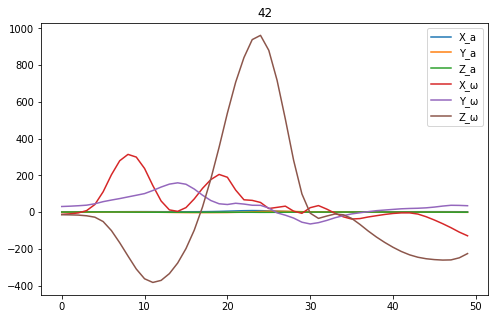

<Figure size 432x288 with 0 Axes>

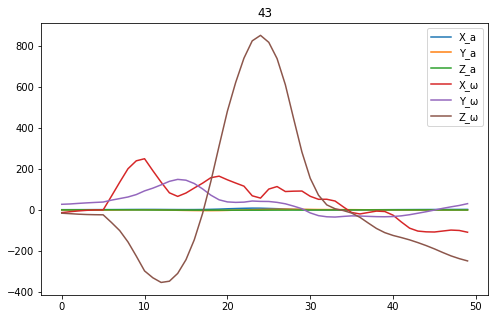

<Figure size 432x288 with 0 Axes>

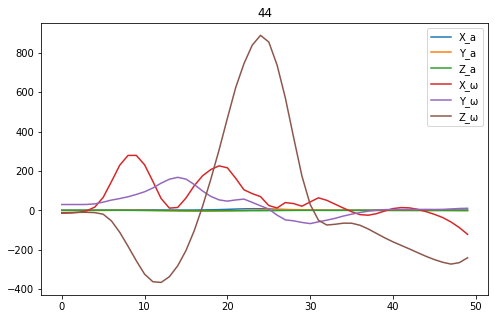

<Figure size 432x288 with 0 Axes>

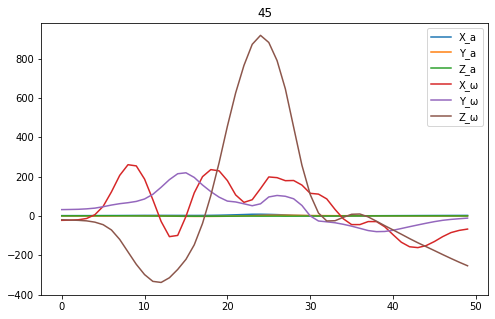

<Figure size 432x288 with 0 Axes>

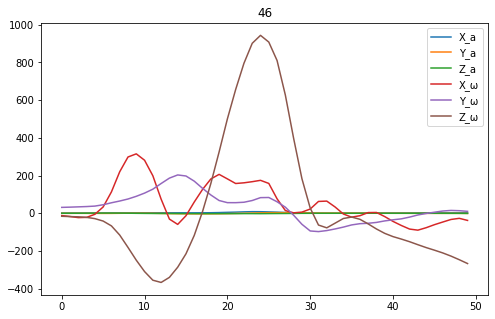

<Figure size 432x288 with 0 Axes>

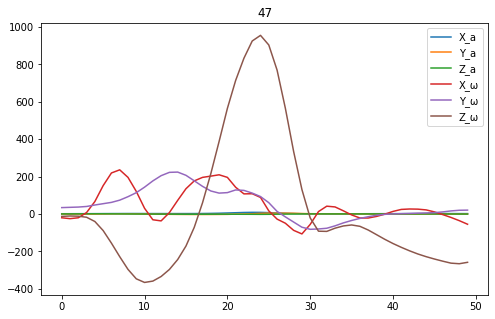

<Figure size 432x288 with 0 Axes>

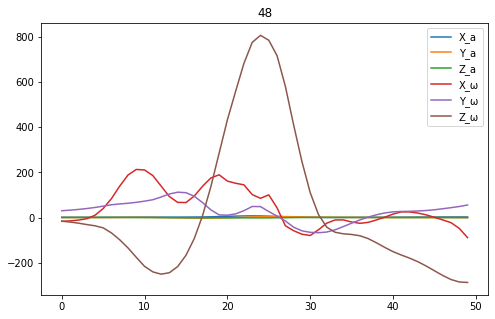

<Figure size 432x288 with 0 Axes>

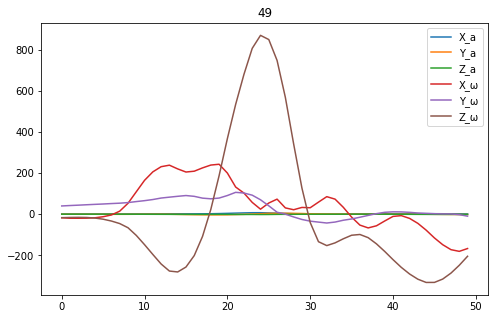

<Figure size 432x288 with 0 Axes>

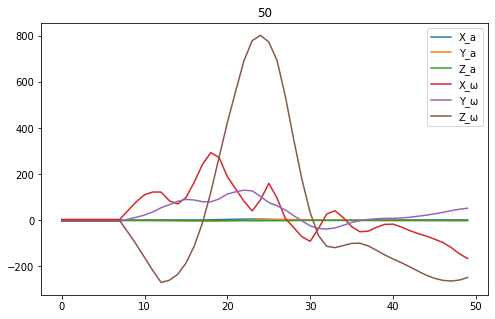

<Figure size 432x288 with 0 Axes>

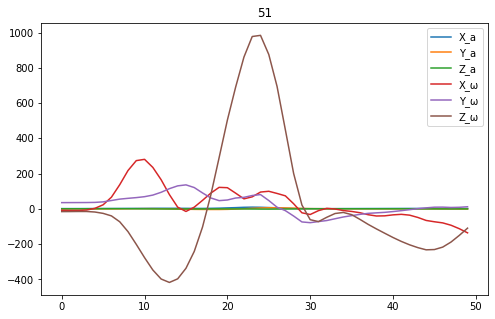

<Figure size 432x288 with 0 Axes>

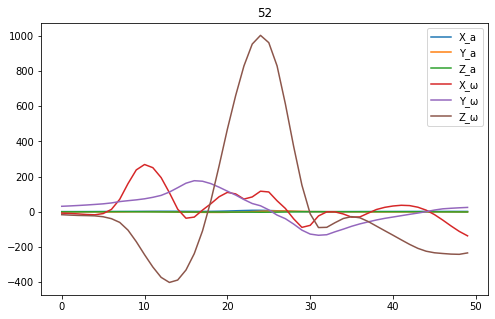

<Figure size 432x288 with 0 Axes>

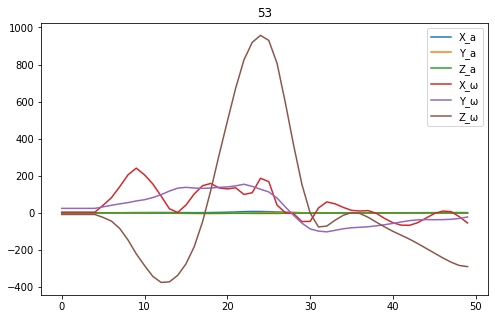

<Figure size 432x288 with 0 Axes>

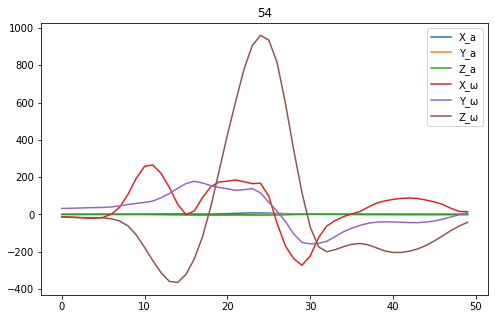

<Figure size 432x288 with 0 Axes>

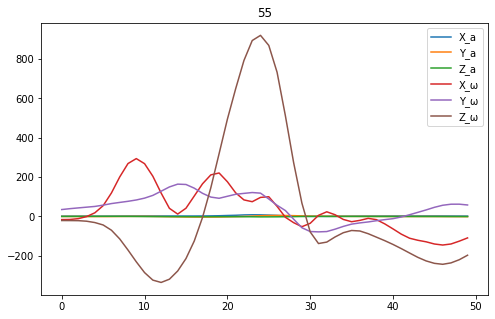

<Figure size 432x288 with 0 Axes>

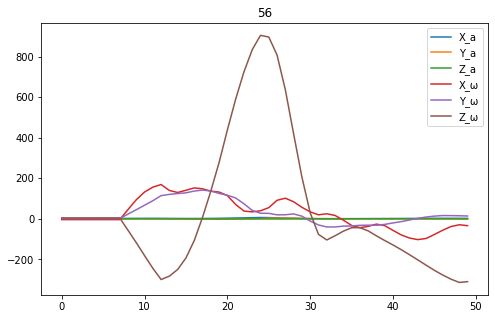

<Figure size 432x288 with 0 Axes>

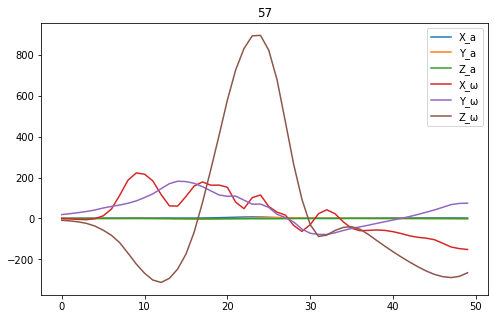

<Figure size 432x288 with 0 Axes>

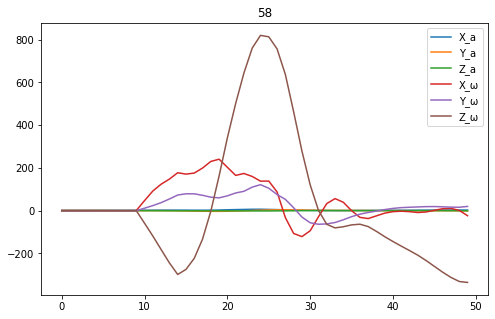

<Figure size 432x288 with 0 Axes>

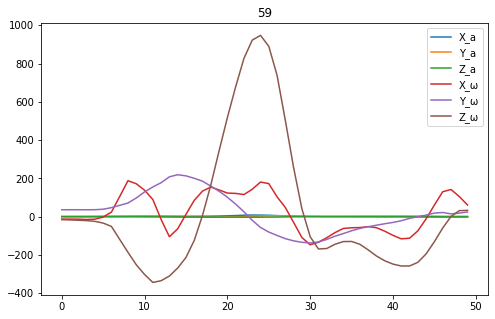

<Figure size 432x288 with 0 Axes>

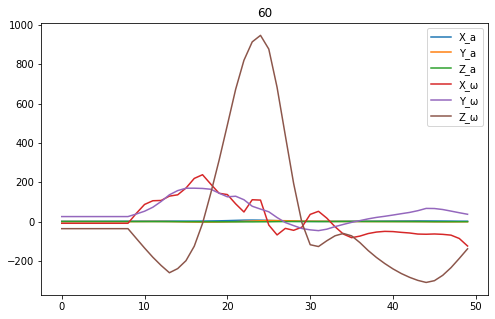

<Figure size 432x288 with 0 Axes>

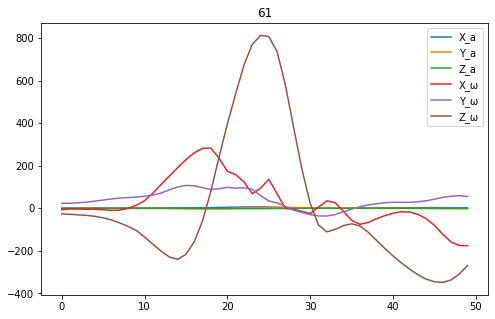

<Figure size 432x288 with 0 Axes>

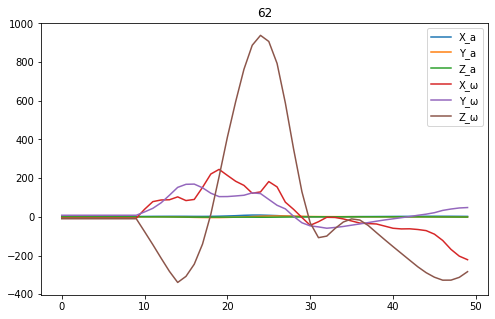

<Figure size 432x288 with 0 Axes>

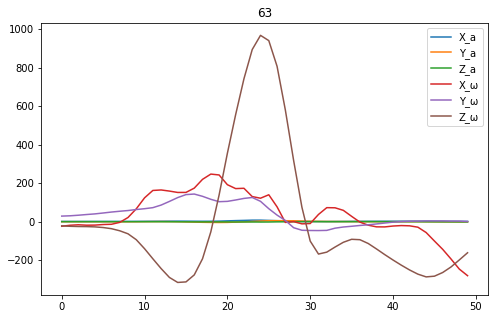

<Figure size 432x288 with 0 Axes>

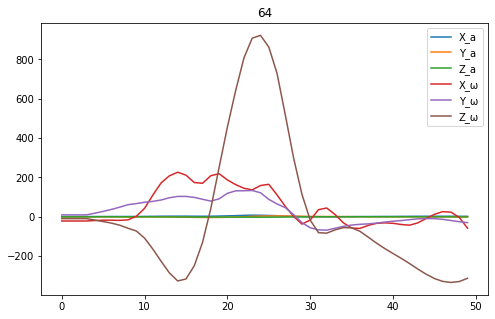

<Figure size 432x288 with 0 Axes>

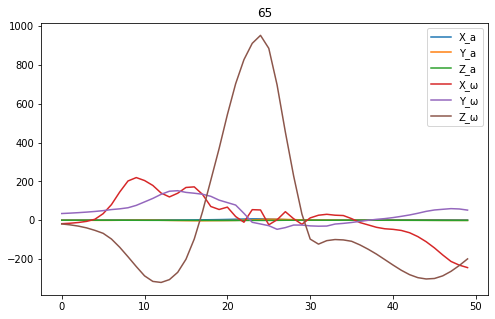

<Figure size 432x288 with 0 Axes>

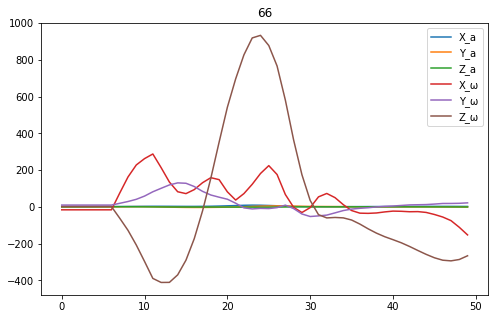

<Figure size 432x288 with 0 Axes>

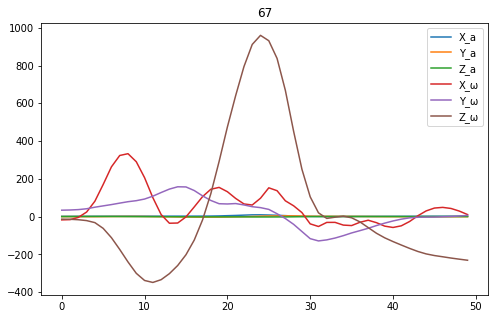

<Figure size 432x288 with 0 Axes>

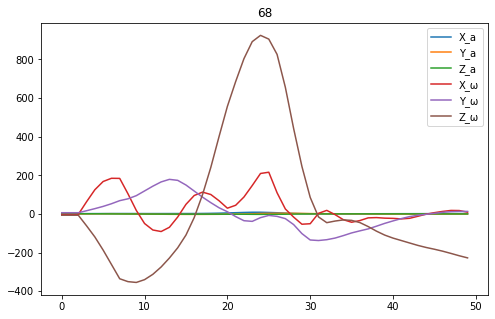

<Figure size 432x288 with 0 Axes>

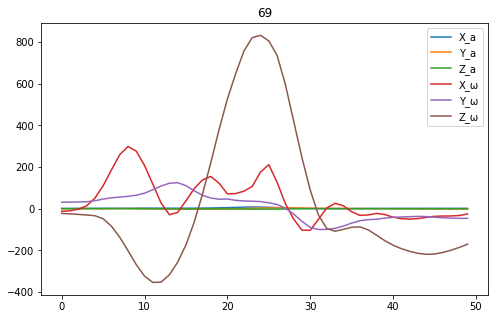

<Figure size 432x288 with 0 Axes>

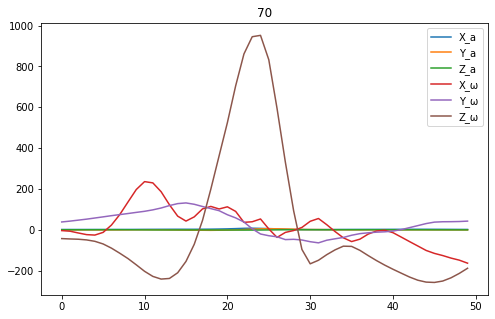

<Figure size 432x288 with 0 Axes>

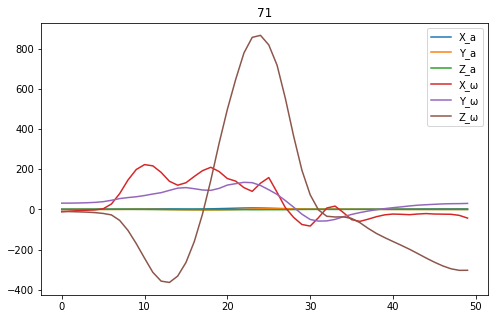

<Figure size 432x288 with 0 Axes>

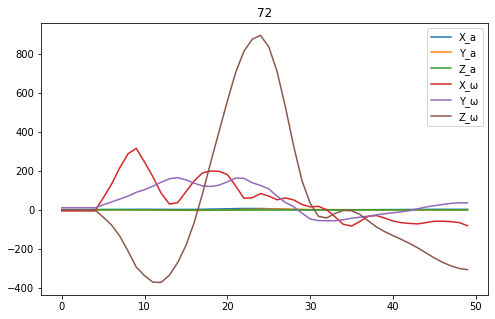

<Figure size 432x288 with 0 Axes>

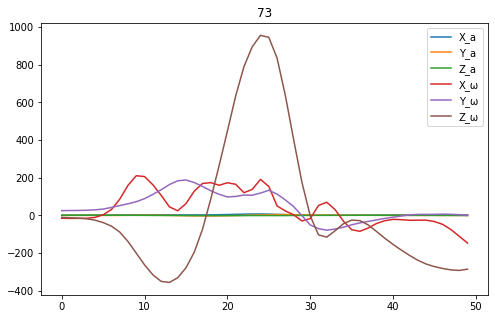

<Figure size 432x288 with 0 Axes>

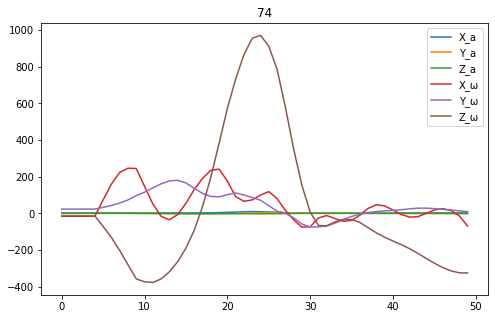

<Figure size 432x288 with 0 Axes>

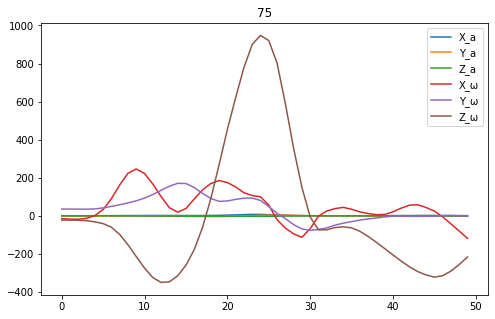

<Figure size 432x288 with 0 Axes>

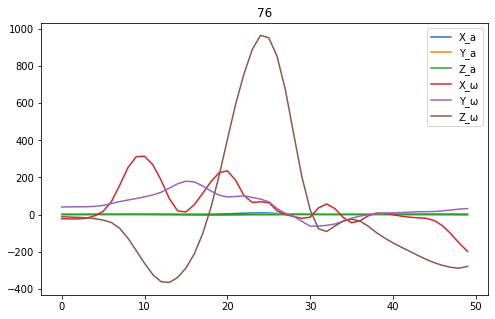

<Figure size 432x288 with 0 Axes>

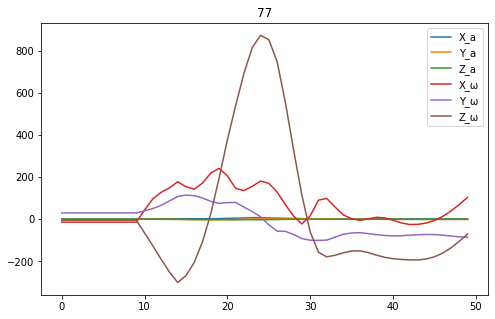

<Figure size 432x288 with 0 Axes>

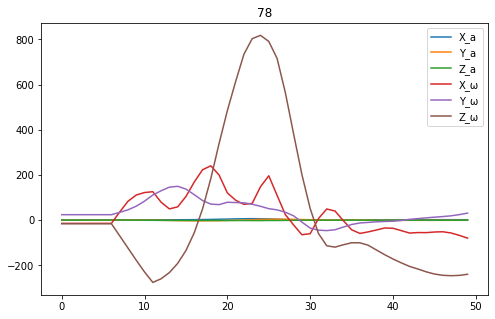

<Figure size 432x288 with 0 Axes>

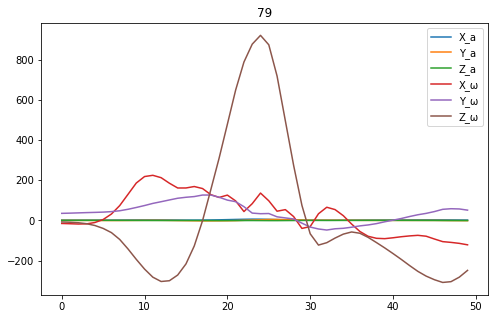

<Figure size 432x288 with 0 Axes>

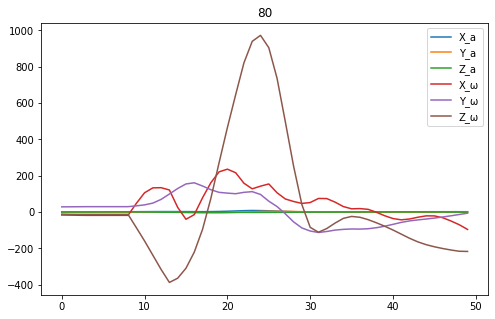

<Figure size 432x288 with 0 Axes>

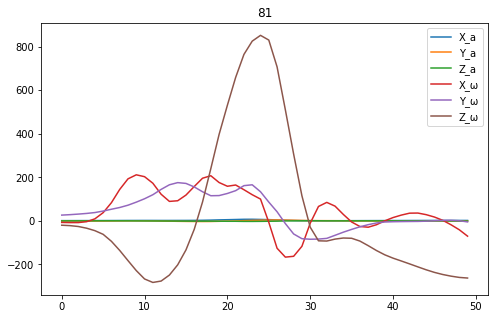

<Figure size 432x288 with 0 Axes>

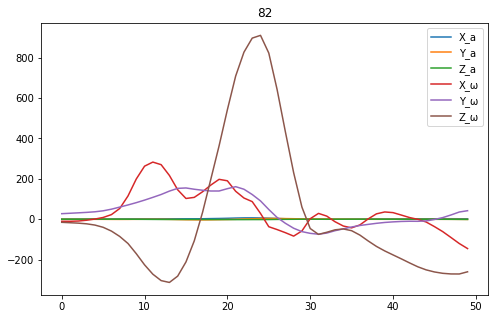

<Figure size 432x288 with 0 Axes>

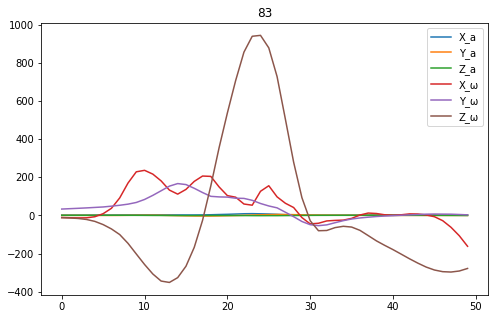

<Figure size 432x288 with 0 Axes>

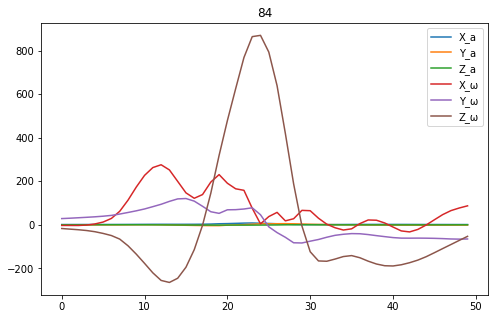

<Figure size 432x288 with 0 Axes>

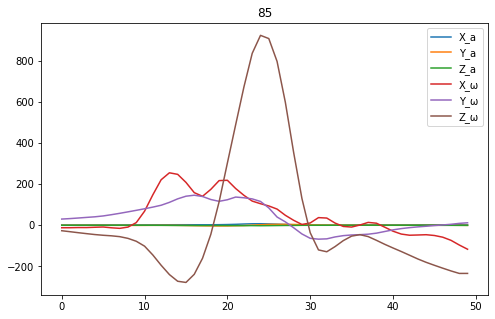

<Figure size 432x288 with 0 Axes>

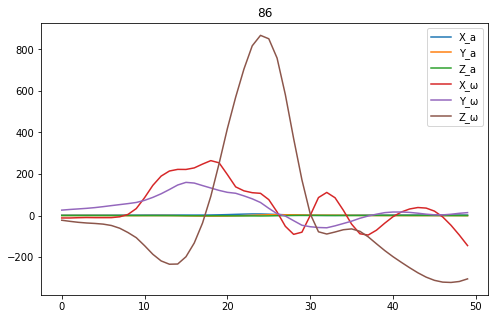

<Figure size 432x288 with 0 Axes>

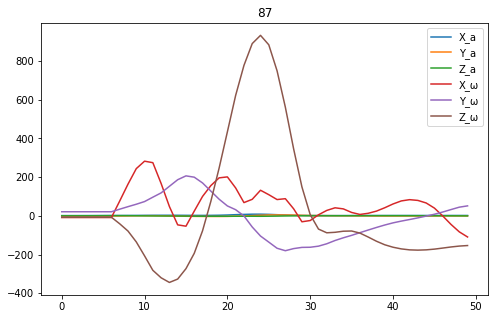

<Figure size 432x288 with 0 Axes>

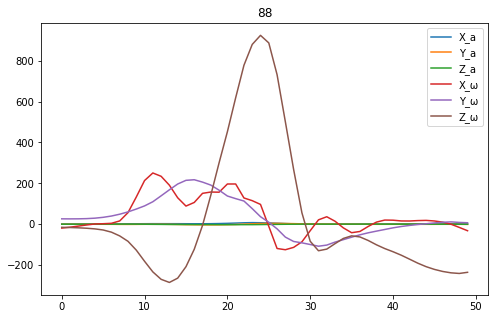

<Figure size 432x288 with 0 Axes>

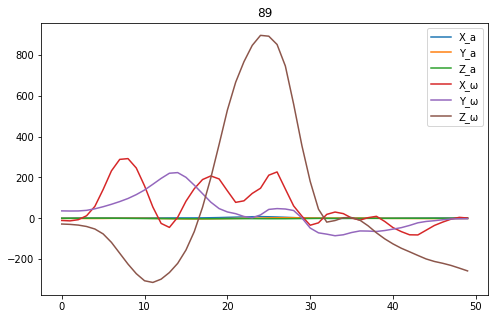

<Figure size 432x288 with 0 Axes>

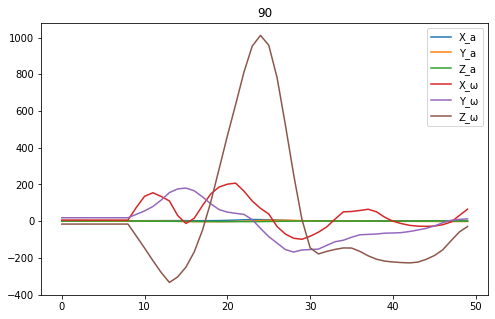

<Figure size 432x288 with 0 Axes>

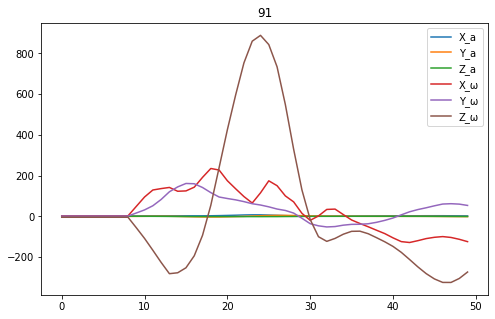

<Figure size 432x288 with 0 Axes>

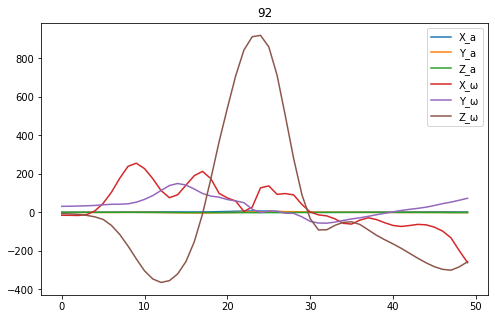

<Figure size 432x288 with 0 Axes>

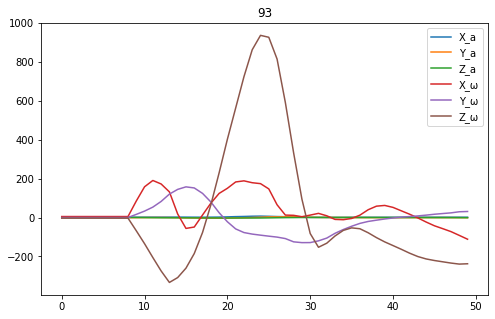

<Figure size 432x288 with 0 Axes>

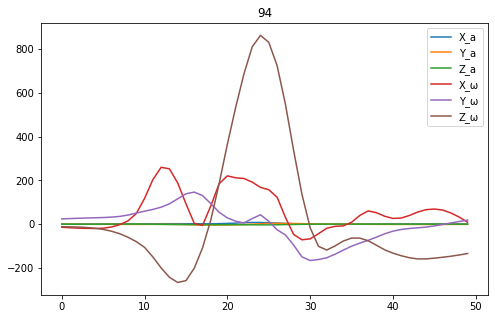

<Figure size 432x288 with 0 Axes>

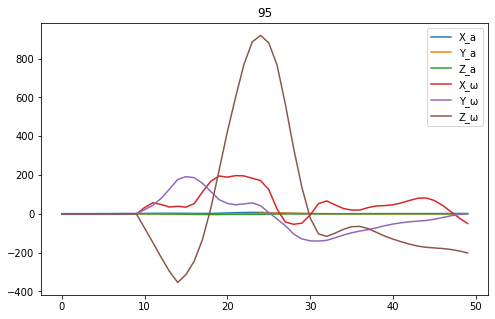

<Figure size 432x288 with 0 Axes>

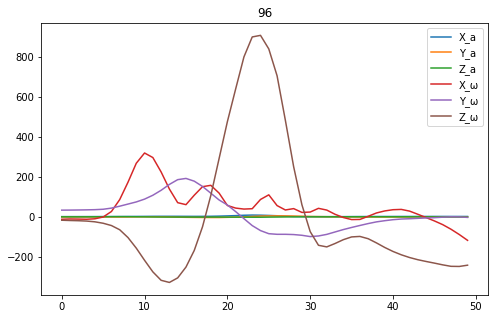

<Figure size 432x288 with 0 Axes>

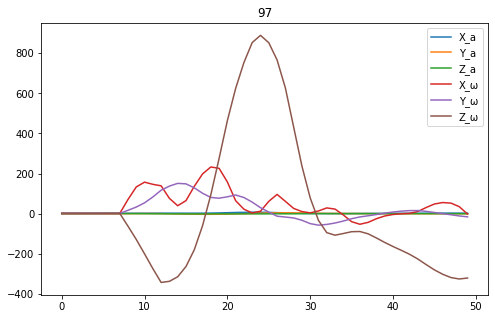

<Figure size 432x288 with 0 Axes>

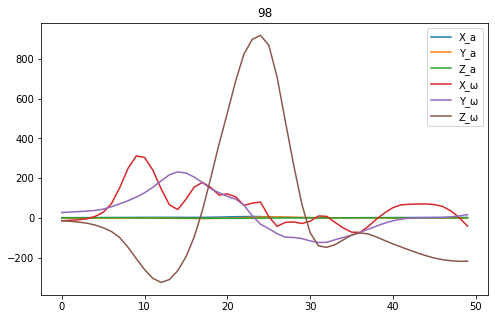

<Figure size 432x288 with 0 Axes>

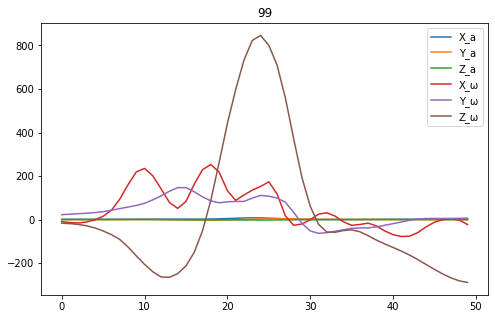

<Figure size 432x288 with 0 Axes>

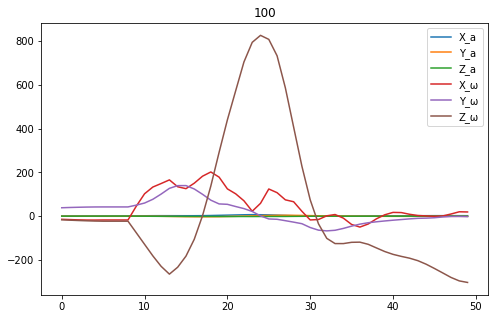

<Figure size 432x288 with 0 Axes>

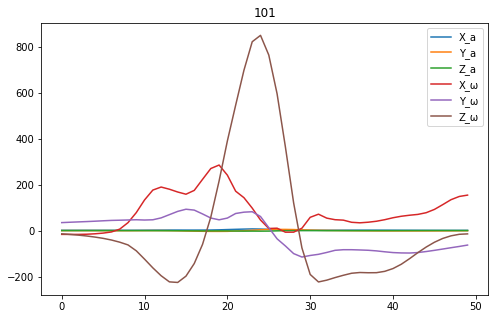

<Figure size 432x288 with 0 Axes>

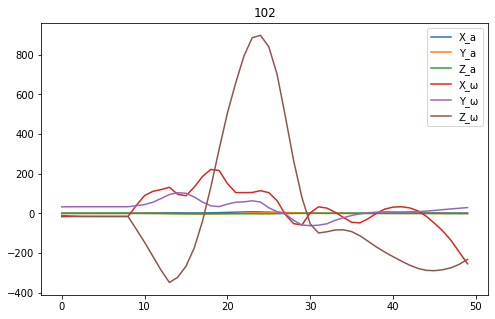

<Figure size 432x288 with 0 Axes>

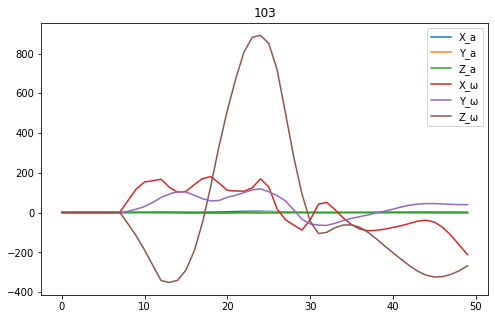

<Figure size 432x288 with 0 Axes>

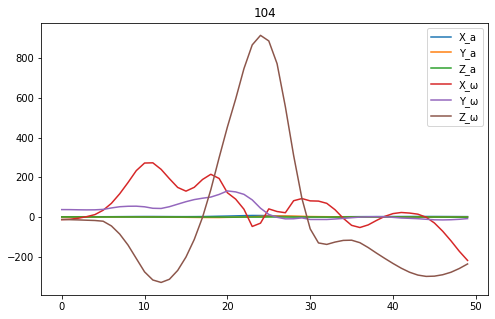

<Figure size 432x288 with 0 Axes>

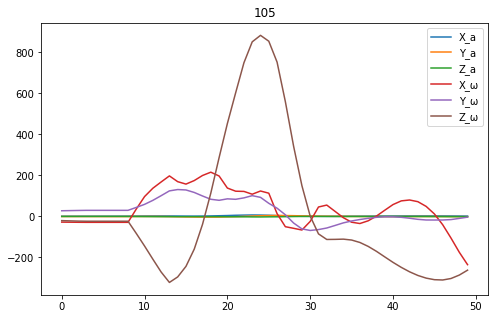

<Figure size 432x288 with 0 Axes>

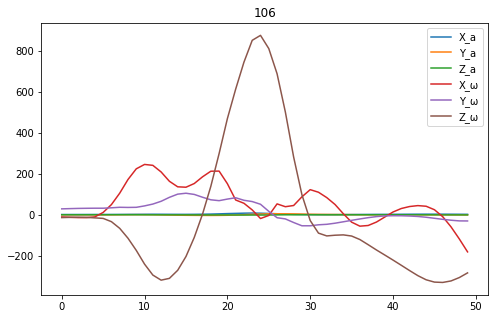

<Figure size 432x288 with 0 Axes>

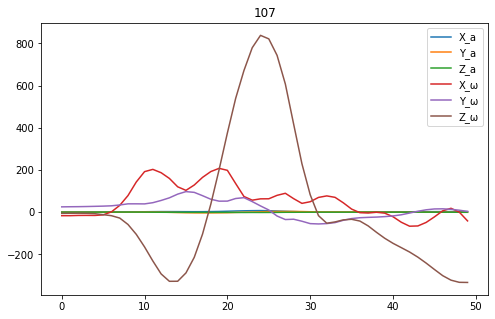

<Figure size 432x288 with 0 Axes>

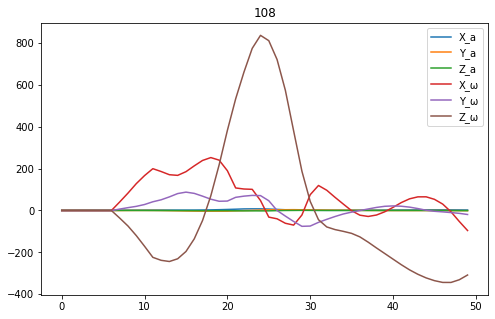

<Figure size 432x288 with 0 Axes>

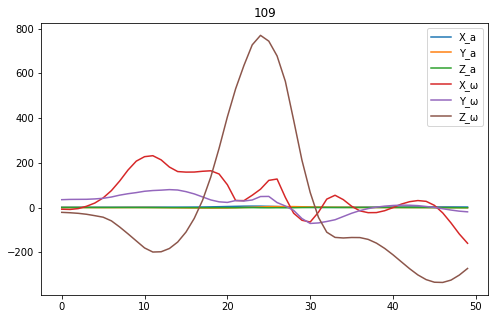

<Figure size 432x288 with 0 Axes>

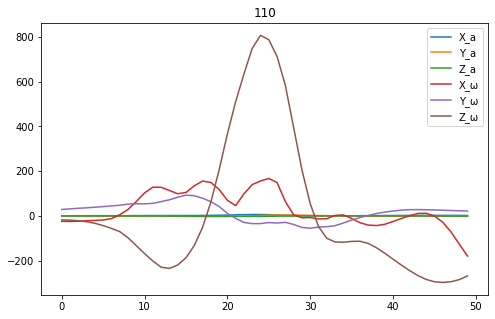

<Figure size 432x288 with 0 Axes>

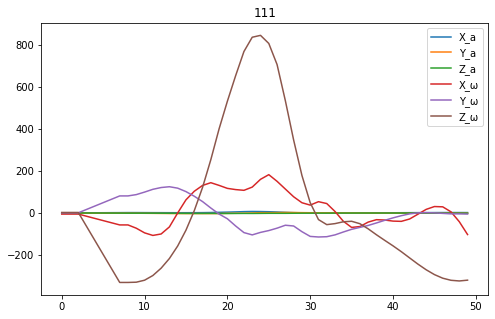

<Figure size 432x288 with 0 Axes>

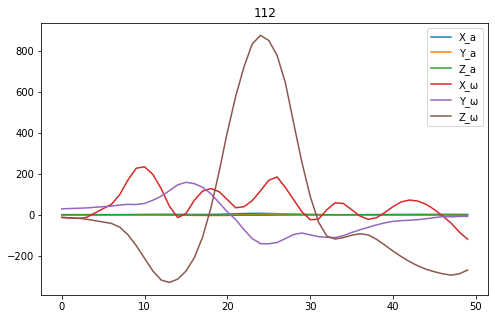

<Figure size 432x288 with 0 Axes>

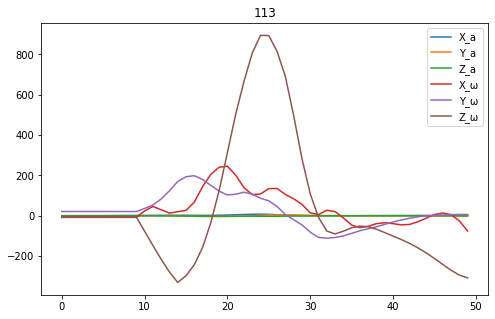

<Figure size 432x288 with 0 Axes>

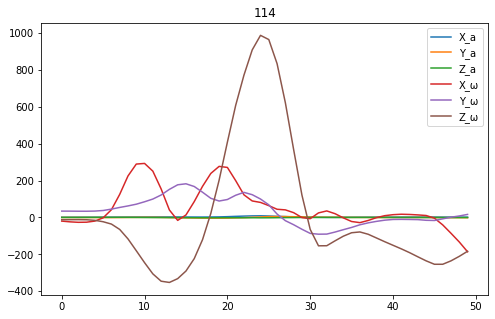

<Figure size 432x288 with 0 Axes>

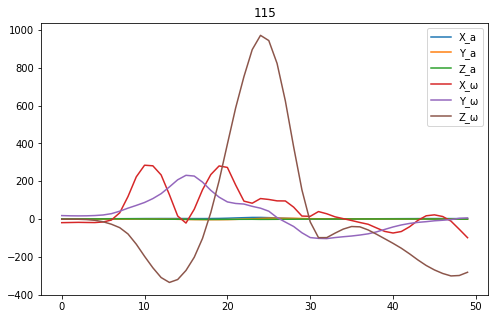

<Figure size 432x288 with 0 Axes>

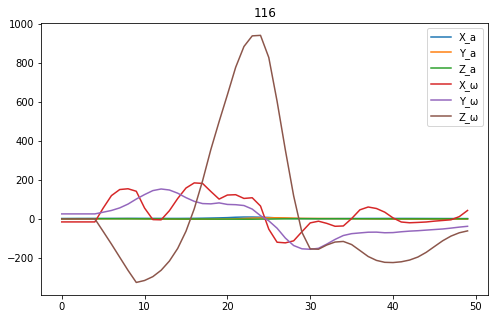

<Figure size 432x288 with 0 Axes>

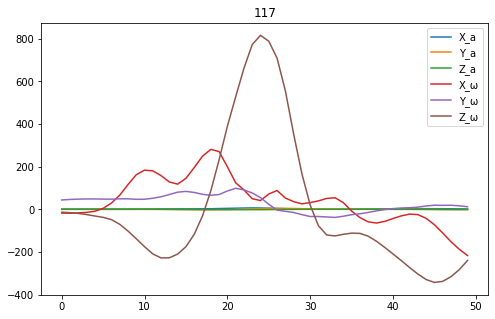

<Figure size 432x288 with 0 Axes>

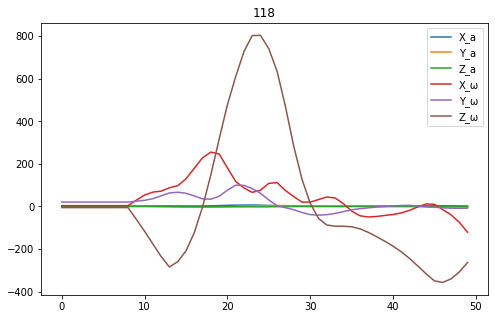

<Figure size 432x288 with 0 Axes>

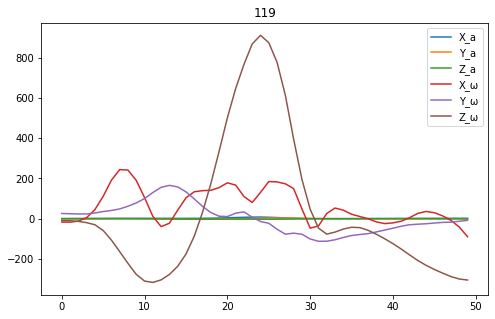

<Figure size 432x288 with 0 Axes>

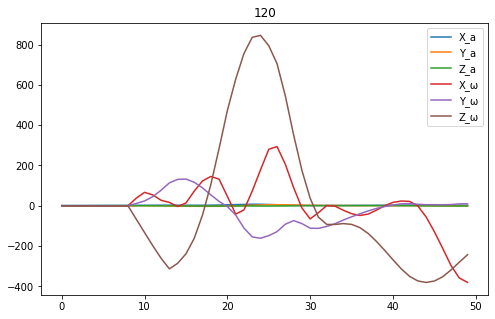

<Figure size 432x288 with 0 Axes>

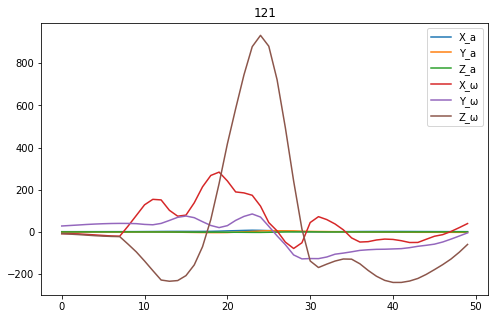

<Figure size 432x288 with 0 Axes>

In [18]:
for i in range(len(df)):
    df[i].plot(figsize=(8,5),title=i)
    plt.show()
    plt.clf()

In [19]:
df_save = pd.DataFrame()
for i in range(0,len(df)):
    df_save = df_save.append(df[i])

In [20]:
df_save

X_a       Y_a       Z_a        X_ω        Y_ω         Z_ω
0   1.087988 -0.126758 -0.008887  -1.560976  25.817074  -43.378049
1   1.113184 -0.100684  0.000879  -3.329268  28.341463  -44.524391
2   1.148437 -0.092090  0.004395  -5.878049  31.073170  -45.756098
3   1.194238 -0.103320 -0.019434 -11.524391  34.682926  -46.987806
4   1.248340 -0.158984  0.096777 -19.475611  38.036585  -49.780489
..       ...       ...       ...        ...        ...         ...
45  1.620508 -1.748535  0.060547 -20.524391 -58.000001 -178.865860
46  1.505762 -1.791992  0.231543 -12.914634 -47.780489 -155.097566
47  1.417676 -1.875098  0.358496   2.195122 -34.060976 -128.548785
48  1.352148 -1.961621  0.476270  20.402439 -19.451220  -96.231711
49  1.306543 -1.923633  0.334863  39.670733  -4.560975  -59.353661

[6100 rows x 6 columns]

In [21]:
df_save.to_excel('zsf_fq_4_10_cut.xlsx')